In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("C:\\Users\\AL-MASA\\Desktop\\Datasets\\deep_learning_datasets\\Potato_Diseases",
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names
n_classes = len(class_names)

In [5]:
#num.of batches
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 2]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[114. 101. 108.]
  [ 96.  83.  90.]
  [104.  91.  98.]
  ...
  [186. 179. 186.]
  [184. 177. 184.]
  [182. 175. 182.]]

 [[123. 110. 117.]
  [139. 126. 133.]
  [140. 127. 134.]
  ...
  [182. 175. 182.]
  [181. 174. 181.]
  [181. 174. 181.]]

 [[139. 126. 133.]
  [115. 102. 109.]
  [142. 129. 136.]
  ...
  [179. 172. 179.]
  [180. 173. 180.]
  [182. 175. 182.]]

 ...

 [[114. 102. 114.]
  [130. 118. 130.]
  [157. 145. 157.]
  ...
  [159. 153. 165.]
  [157. 151. 163.]
  [158. 152. 164.]]

 [[125. 113. 125.]
  [120. 108. 120.]
  [109.  97. 109.]
  ...
  [160. 154. 166.]
  [159. 153. 165.]
  [161. 155. 167.]]

 [[142. 130. 142.]
  [137. 125. 137.]
  [106.  94. 106.]
  ...
  [160. 154. 166.]
  [160. 154. 166.]
  [164. 158. 170.]]]


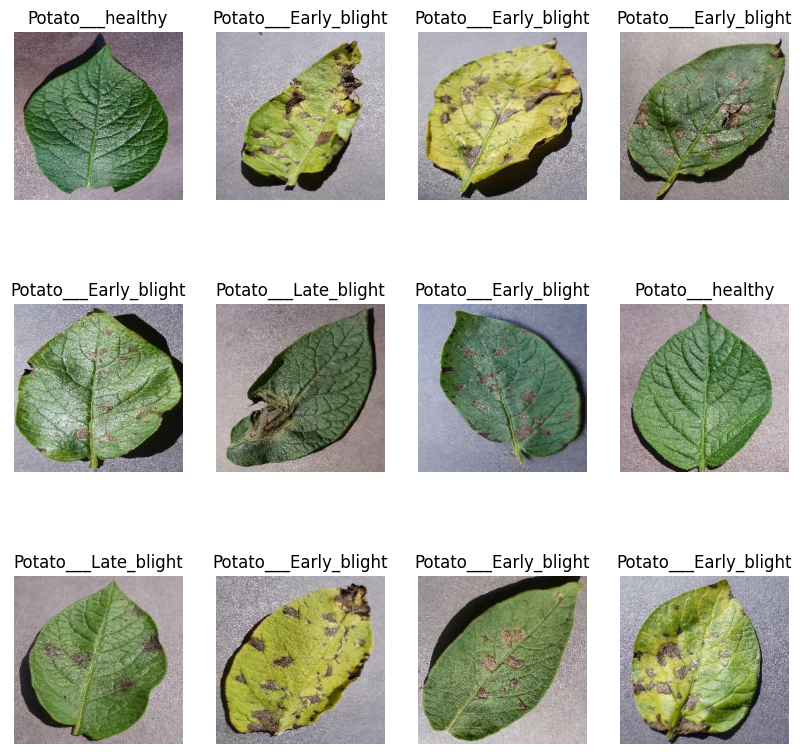

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
len(dataset)

68

#### 80% ==> training
#### 20% ==> 10% validation, 10% test

In [10]:
train_size = 0.8
len(dataset)* train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size = 0.1
len(test_ds) * val_size

1.4000000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE ),
    layers.experimental.preprocessing.Rescaling(1.0/255) 
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2) 
])

In [24]:
input_shape=(BATCH_SIZE, IMAGE_SIZE , IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [26]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 31s 239ms/step - loss: 0.9304 - accuracy: 0.4722 - val_loss: 0.9081 - val_accuracy: 0.5359
Epoch 2/50
54/54 [==============================] - 11s 195ms/step - loss: 0.7707 - accuracy: 0.5978 - val_loss: 0.7015 - val_accuracy: 0.6568
Epoch 3/50
54/54 [==============================] - 10s 194ms/step - loss: 0.4632 - accuracy: 0.7911 - val_loss: 0.3880 - val_accuracy: 0.8565
Epoch 4/50
54/54 [==============================] - 11s 197ms/step - loss: 0.2893 - accuracy: 0.8872 - val_loss: 0.3553 - val_accuracy: 0.8727
Epoch 5/50
54/54 [==============================] - 11s 195ms/step - loss: 0.2424 - accuracy: 0.9068 - val_loss: 0.2420 - val_accuracy: 0.9086
Epoch 6/50
54/54 [==============================] - 11s 196ms/step - loss: 0.1888 - accuracy: 0.9300 - val_loss: 0.2546 - val_accuracy: 0.9080
Epoch 7/50
54/54 [==============================] - 10s 193ms/step - loss: 0.2137 - accuracy: 0.9091 - val_loss: 0.1750 - val_accuracy: 0.9381

In [28]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 2s 35ms/step - loss: 0.0195 - accuracy: 0.9913


In [29]:
scores

[0.019504645839333534, 0.9913194179534912]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.4722222089767456,
 0.5978009104728699,
 0.7910879850387573,
 0.8871527910232544,
 0.9068287014961243,
 0.9299768805503845,
 0.9091435074806213,
 0.9508101940155029,
 0.9467592835426331,
 0.9525462985038757,
 0.9299768805503845,
 0.9594907164573669,
 0.9710648059844971,
 0.9670138955116272,
 0.9646990895271301,
 0.9728009104728699,
 0.9745370149612427,
 0.9756944179534912,
 0.9756944179534912,
 0.9768518805503845,
 0.984375,
 0.9849537014961243,
 0.9866898059844971,
 0.9866898059844971,
 0.9907407164573669,
 0.9878472089767456,
 0.9866898059844971,
 0.9878472089767456,
 0.9878472089767456,
 0.9809027910232544,
 0.9930555820465088,
 0.9976851940155029,
 0.9872685074806213,
 0.9918981194496155,
 0.9959490895271301,
 0.9803240895271301,
 0.9878472089767456,
 0.9953703880310059,
 0.9693287014961243,
 0.9924768805503845,
 0.9942129850387573,
 0.9947916865348816,
 0.9942129850387573,
 0.9890046119689941,
 0.9988425970077515,
 0.9971064925193787,
 0.9861111044883728,
 0.9913194179534912,
 0

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

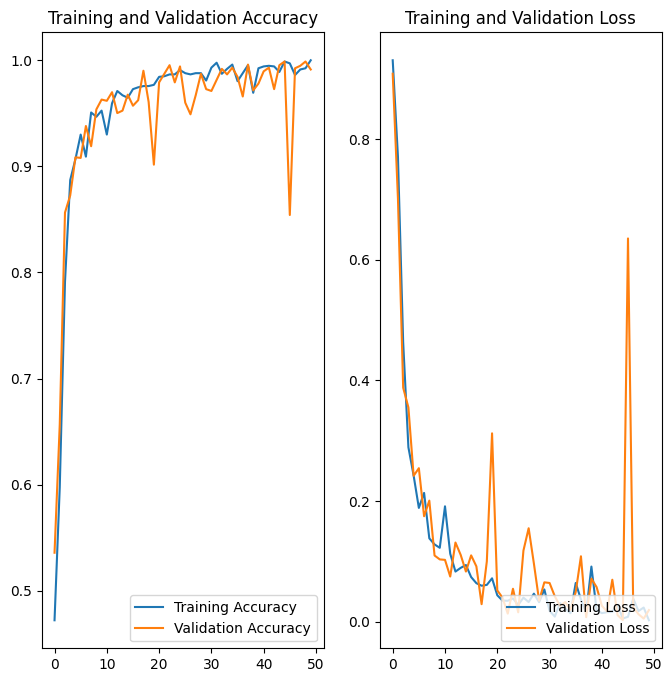

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
np.argmax([5.4362631e-06, 9.9999309e-01, 1.3997528e-06])

1

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 46ms/step
predicted label: Potato___healthy


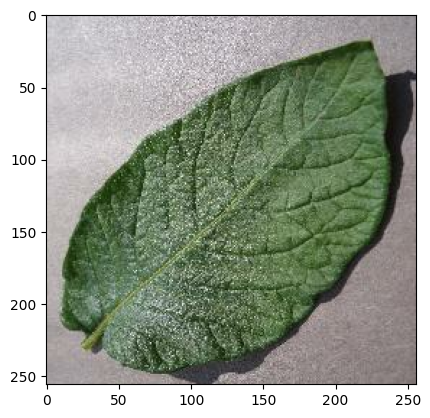

In [76]:
for images_batch, labels_batch in test_ds.take(1):
     first_image = images_batch[0].numpy().astype('uint8')
     first_label = labels_batch[0].numpy()

     print("first image to predict")
     plt.imshow(first_image)
     print("actual label:", class_names[first_label])

     batch_prediction = model.predict(image_batch)
     print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [77]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 8ms/step


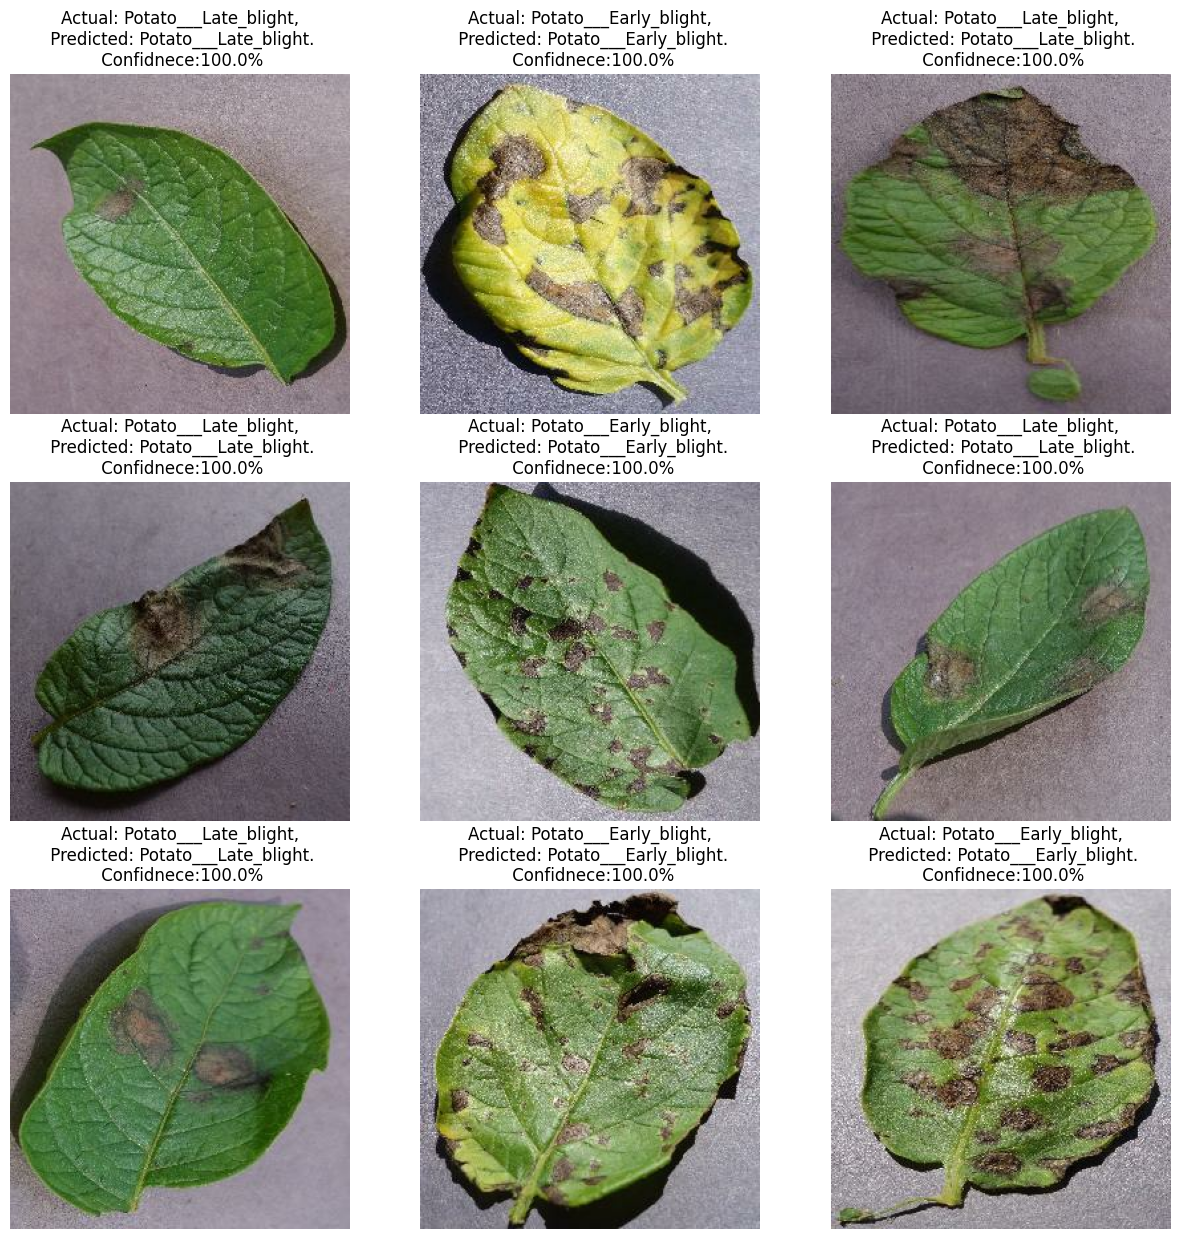

In [78]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidnece:{confidence}%")
        
        plt.axis("off")

In [57]:
model_version=1
model.save(f"./saved_models/{model_version}")

INFO:tensorflow:Assets written to: ./saved_models/1\assets


INFO:tensorflow:Assets written to: ./saved_models/1\assets


In [86]:
import os
model_version = max([int(i) for i in os.listdir("./models")] + [0])+1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/3\assets


INFO:tensorflow:Assets written to: ./models/3\assets


### GUI

In [7]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

# Load your trained model
model = tf.keras.models.load_model(r'C:\Users\AL-MASA\End_to_End projects in machine learning\Potato_disease_classification\saved_models\1')  # adjust path if different
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # adjust if different

# Image size based on your model
IMAGE_SIZE = 256

def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  #create a batch

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction[0])]
        confidence = round(100 * np.max(prediction[0]), 2)

        result_label.config(text=f"Prediction: {predicted_class}\nConfidence: {confidence}%", font=('Arial', 14))
        
        img = Image.open(file_path)
        img = img.resize((300, 300))
        img = ImageTk.PhotoImage(img)
        
        panel.config(image=img)
        panel.image = img

# Create the GUI window
window = tk.Tk()
window.title("Potato Disease Classifier")
window.geometry("500x600")
window.config(bg="lightblue")

upload_btn = Button(window, text="Upload Potato Leaf Image", command=upload_image, font=('Arial', 16), bg="green", fg="white")
upload_btn.pack(pady=20)

panel = Label(window)
panel.pack(pady=10)

result_label = Label(window, text="", bg="lightblue", font=('Arial', 14))
result_label.pack(pady=20)

window.mainloop()


1/1 [==============================] - 0s 103ms/step
